In [9]:
import tensorflow as tf
import numpy as np

# gpus = tf.config.experimental.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(gpus[0],True)

A = np.array([[1,2,3,4],[5,6,7,8]], dtype="float32")
A = A.reshape(1,2,4,1) #batch, rows, cols, channels

x = tf.keras.layers.Input(shape=A.shape[1:])
y = tf.keras.layers.Reshape([4,2,1])(x) #(1,4,2,1)
z = tf.keras.layers.Permute([2,1,3])(x)

model = tf.keras.Model(inputs=x, outputs=[y,z])
model.summary()


output = model.predict(A)
print("A[0,:,;0]=",A[0,:,:,0])
print("output[0]=",output[0][0,:,:,0])
print("output[1]=",output[1][0,:,:,0])

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 2, 4, 1)]            0         []                            
                                                                                                  
 reshape_6 (Reshape)         (None, 4, 2, 1)              0         ['input_7[0][0]']             
                                                                                                  
 permute_3 (Permute)         (None, 4, 2, 1)              0         ['input_7[0][0]']             
                                                                                                  
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________________________________________________________

1/1 [==============================] - 0s 43ms/step
A[0,:,;0]= [[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
output[0]= [[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]
output[1]= [[1. 5.]
 [2. 6.]
 [3. 7.]
 [4. 8.]]


In [10]:
A = np.array([[1,2,3,4],[5,6,7,8]], dtype="float32")
A = A.reshape(1,2,4,1) #batch, rows, cols, channels

x = tf.keras.layers.Input(shape=A.shape[1:])
y = tf.keras.layers.UpSampling2D()(x) #size =(2,2), [none,4,8,1]

u = tf.keras.layers.Reshape([8,1])(x)
z = tf.keras.layers.UpSampling1D()(u)

model = tf.keras.Model(inputs=x, outputs = [y,z])
model.summary()

output = model.predict(A)
print("A[0,:,;0]=",A[0,:,:,0])
print("output[0]=",output[0][0,:,:,0])
print("output[1]=",output[1][0,:,0])

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 2, 4, 1)]            0         []                            
                                                                                                  
 reshape_7 (Reshape)         (None, 8, 1)                 0         ['input_8[0][0]']             
                                                                                                  
 up_sampling2d_3 (UpSamplin  (None, 4, 8, 1)              0         ['input_8[0][0]']             
 g2D)                                                                                             
                                                                                                  


 up_sampling1d_3 (UpSamplin  (None, 16, 1)                0         ['reshape_7[0][0]']           
 g1D)                                                                                             
                                                                                                  
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________
1/1 [==============================] - 0s 50ms/step
A[0,:,;0]= [[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
output[0]= [[1. 1. 2. 2. 3. 3. 4. 4.]
 [1. 1. 2. 2. 3. 3. 4. 4.]
 [5. 5. 6. 6. 7. 7. 8. 8.]
 [5. 5. 6. 6. 7. 7. 8. 8.]]
output[1]= [1. 1. 2. 2. 3. 3. 4. 4. 5. 5. 6. 6. 7. 7. 8. 8.]


In [11]:
A = np.array([1,2,3,4,5]).astype("float32")
B = np.array([1,2,3,4,5,6,7,8,]).astype("float32")
A = np.reshape(A,(1,-1,1))
B = np.reshape(B,(1,-1,1))

input_x = tf.keras.layers.Input(shape=A.shape[1:])
input_y = tf.keras.layers.Input(shape=B.shape[1:])

x = tf.keras.layers.MaxPool1D()(input_x)
y = tf.keras.layers.MaxPool1D()(input_y)

pad = y.shape[1] - x.shape[1]
x = tf.keras.layers.ZeroPadding1D(padding=(0,pad))(x)

out2 = tf.keras.layers.Add()([x,y])
out3 = tf.keras.layers.Concatenate()([x,y])
out4 = tf.keras.layers.Dot(axes=[1,1])([x,y])
out5 = tf.keras.layers.Dot(axes=-1)([x,y])

out_list = [x,y,out2,out3,out4,out5]

model =tf.keras.Model(inputs = [input_x,input_y], outputs = out_list)
print("model.output_shape=",model.output_shape)

output =model.predict([A,B])
for i in range(len(output)):
    print("output[{}]={}".format(i,output[i]))

model.output_shape= [(None, 4, 1), (None, 4, 1), (None, 4, 1), (None, 4, 2), (None, 1, 1), (None, 4, 4)]
1/1 [==============================] - 0s 71ms/step
output[0]=[[[2.]
  [4.]
  [0.]
  [0.]]]
output[1]=[[[2.]
  [4.]
  [6.]
  [8.]]]
output[2]=[[[4.]
  [8.]
  [6.]
  [8.]]]
output[3]=[[[2. 2.]
  [4. 4.]
  [0. 6.]
  [0. 8.]]]
output[4]=[[[20.]]]
output[5]=[[[ 4.  8. 12. 16.]
  [ 8. 16. 24. 32.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]


In [13]:
A = np.array([[1,2],[3,4]],dtype="float32")
A = A.reshape(-1,2,2,1)

B = np.array([[5,6],[7,8]],dtype="float32")
B = B.reshape(-1,2,2,1)

C = np.array([1,2,3]).astype("float32")
C = C.reshape(-1,3,1,1)

x = tf.keras.layers.Input(shape=A.shape[1:])
y = tf.keras.layers.Input(shape=B.shape[1:])
z = tf.keras.layers.Input(shape=C.shape[1:])

out3 = tf.keras.layers.Add()([x,y])
out4 = tf.keras.layers.Concatenate()([x,y])
out5 = tf.keras.layers.Dot(axes=-1)([x,y])
out6 = tf.keras.layers.Dot(axes=-1)([x,z])

out_list = [x,y,z,out3,out4,out5,out6]
model =tf.keras.Model(inputs = [x,y,z], outputs = out_list)

print("model.output_shape=", model.output_shape)

output = model.predict([A,B,C])
for i in range(len(output)):
    print("output[{}]={}".format(i,output[i]))


model.output_shape= [(None, 2, 2, 1), (None, 2, 2, 1), (None, 3, 1, 1), (None, 2, 2, 1), (None, 2, 2, 2), (None, 2, 2, 2, 2), (None, 2, 2, 3, 1)]
1/1 [==============================] - 0s 164ms/step
output[0]=[[[[1.]
   [2.]]

  [[3.]
   [4.]]]]
output[1]=[[[[5.]
   [6.]]

  [[7.]
   [8.]]]]
output[2]=[[[[1.]]

  [[2.]]

  [[3.]]]]
output[3]=[[[[ 6.]
   [ 8.]]

  [[10.]
   [12.]]]]
output[4]=[[[[1. 5.]
   [2. 6.]]

  [[3. 7.]
   [4. 8.]]]]
output[5]=[[[[[ 5.  6.]
    [ 7.  8.]]

   [[10. 12.]
    [14. 16.]]]


  [[[15. 18.]
    [21. 24.]]

   [[20. 24.]
    [28. 32.]]]]]
output[6]=[[[[[ 1.]
    [ 2.]
    [ 3.]]

   [[ 2.]
    [ 4.]
    [ 6.]]]


  [[[ 3.]
    [ 6.]
    [ 9.]]

   [[ 4.]
    [ 8.]
    [12.]]]]]


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_34 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 input_35 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 and (Dense)                 (None, 1)                    3         ['input_34[0][0]']            
                                                                                                  
 or (Dense)                  (None, 1)                    3         ['input_35[0][0]']            
                                                                                           

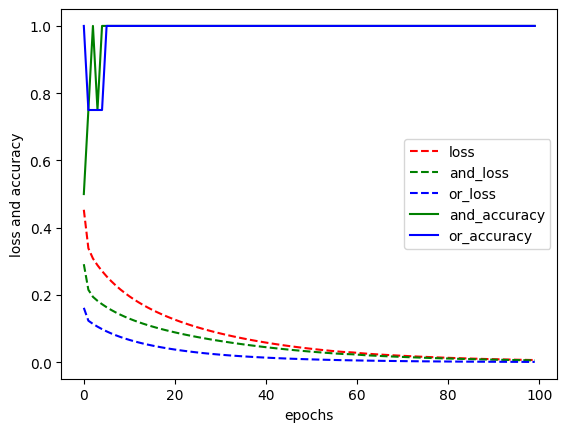

In [26]:

from keras import Input
from keras.layers import Dense
import matplotlib.pyplot as plt

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype="float32")

y_and = np.array([[0],[0],[0],[1]], dtype=np.float32)
y_or = np.array([[0],[1],[1],[1]],dtype=np.float32)

x_and = Input(shape=(2,))
out_and = Dense(units =1 ,activation = "sigmoid", name = "and")(x_and)

x_or = Input(shape=(2, ))
out_or = Dense(units = 1, activation = "sigmoid", name = "or")(x_or)

model = tf.keras.Model(inputs = [x_and,x_or], outputs = [out_and,out_or])
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate= 0.1)
model.compile(optimizer= opt, loss ="mse",metrics=["accuracy"])
ret = model.fit(x =[X,X],y=[y_and,y_or], epochs= 100, batch_size=4, verbose=0)
test = model.evaluate(x =[X,X],y=[y_and,y_or],verbose=0)
print("total loss = ",test[0])
print("AND: loss ={}, acc={}".format(test[1],test[3]))
print("OR: loss = {}, acc={}".format(test[2],test[4]))

plt.plot(ret.history["loss"], "r--", label="loss")
plt.plot(ret.history["and_loss"], "g--", label="and_loss")
plt.plot(ret.history["or_loss"], "b--", label="or_loss")
plt.plot(ret.history["and_accuracy"], "g-", label="and_accuracy")
plt.plot(ret.history["or_accuracy"], "b-", label="or_accuracy")
plt.xlabel("epochs")
plt.ylabel("loss and accuracy")
plt.legend(loc ="best")
plt.show()


Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_54 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 input_55 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 input_56 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 2)                    6         ['input_54[0][0]']            
                                                                                           

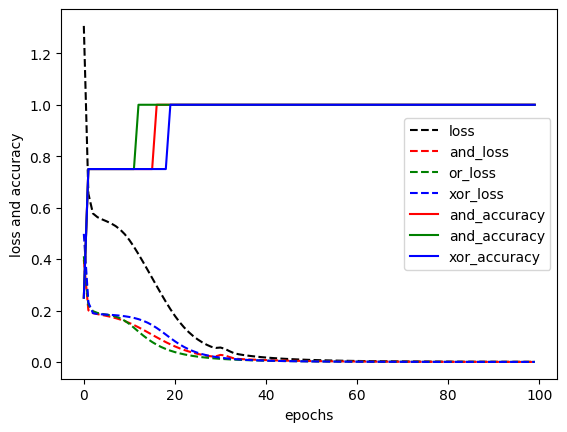

In [34]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype="float32")

y_and = np.array([[0],[0],[0],[1]], dtype=np.float32)
y_or = np.array([[0],[1],[1],[1]],dtype=np.float32)
y_xor = np.array([[0],[1],[1],[1]],dtype=np.float32)

y_and = tf.keras.utils.to_categorical(y_and)
y_or = tf.keras.utils.to_categorical(y_or)
y_xor = tf.keras.utils.to_categorical(y_xor)

x_and = Input(shape=(2,))
x = Dense(units=2, activation="sigmoid")(x_and)
out_and = Dense(units =2 ,activation = "softmax", name = "and")(x)

x_or = Input(shape=(2,))
x = Dense(units=2, activation="sigmoid")(x_or)
out_or = Dense(units =2 ,activation = "softmax", name = "or")(x)

x_xor = Input(shape=(2,))
x = Dense(units=2, activation="sigmoid")(x_xor)
out_xor = Dense(units =2 ,activation = "softmax", name = "xor")(x)

model = tf.keras.Model(inputs = [x_and,x_or,x_xor], outputs = [out_and,out_or,out_xor])
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss="mse", metrics=["accuracy"])
ret = model.fit(x= [X,X,X], y=[y_and,y_or,y_xor], epochs=100, batch_size=4, verbose= 0 )
test = model.evaluate(x= [X,X,X], y=[y_and,y_or,y_xor], verbose= 0)
print("total loss = ",test[0])
print("AND: loss ={}, acc={}".format(test[1],test[4]))
print("OR: loss = {}, acc={}".format(test[2],test[5]))
print("XOR: loss = {}, acc={}".format(test[3],test[6]))

plt.plot(ret.history["loss"], "k--", label="loss")
plt.plot(ret.history["and_loss"], "r--", label="and_loss")
plt.plot(ret.history["or_loss"], "g--", label="or_loss")
plt.plot(ret.history["xor_loss"], "b--", label="xor_loss")

plt.plot(ret.history["and_accuracy"], "r-", label="and_accuracy")
plt.plot(ret.history["or_accuracy"], "g-", label="and_accuracy")
plt.plot(ret.history["xor_accuracy"], "b-", label="xor_accuracy")
plt.xlabel("epochs")
plt.ylabel("loss and accuracy")
plt.legend(loc ="best")
plt.show()